In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS 
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

In [2]:
# Reads 'BBC_AA_News.xlsx' file  
df = pd.read_excel(r"BBC_AA_News.xlsx", encoding ="latin-1") 
df['News'].head()

0    Image copyright Getty Images\nAlcoholics Anony...
1    A woman has pleaded guilty to being almost eig...
2    Image copyright Other Image caption An AA meet...
3    Image copyright Getty Images Image caption Jay...
4    Image caption The true nature of alcoholism is...
Name: News, dtype: object

In [3]:
# Lower casing
df['News'] = df['News'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Removal of Stop Words
stop = stopwords.words('english')
df['News'] = df['News'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Common word removal
freq = pd.Series(' '.join(df['News']).split()).value_counts()[:10]
freq = list(freq.index)
df['News'] = df['News'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

# Rare words removal
freq = pd.Series(' '.join(df['News']).split()).value_counts()[-10:]
freq = list(freq.index)
df['News'] = df['News'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

# Spelling correction
df['News'][:5].apply(lambda x: str(TextBlob(x).correct()))

# Tokenization
TextBlob(df['News'][1]).words

# Stemming
st = PorterStemmer()
df['News'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

# Lemmatization
df['News'] = df['News'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# N-gram
TextBlob(df['News'][0]).ngrams(2)

#  Term frequency
tf1 = (df['News'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']

# Inverse Document Frequency
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['News'].str.contains(word)])))
    
#  Term Frequency – Inverse Document Frequency (TF-IDF)
tf1['tfidf'] = tf1['tf'] * tf1['idf']

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(df['News'])

bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(df['News'])

# Sentiment Analysis
df['sentiment'] = df['News'].apply(lambda x: TextBlob(x).sentiment[0] )
df[['News','sentiment']].head()


,News,sentiment
0,image copyright getty image anonymous (aa) mee...,0.122333
1,woman pleaded guilty almost eight time drink d...,0.038889
2,image copyright image caption aa meeting depic...,0.075869
3,image copyright getty image image caption jay-...,-0.011590
4,image caption true nature alcoholism controver...,0.020191


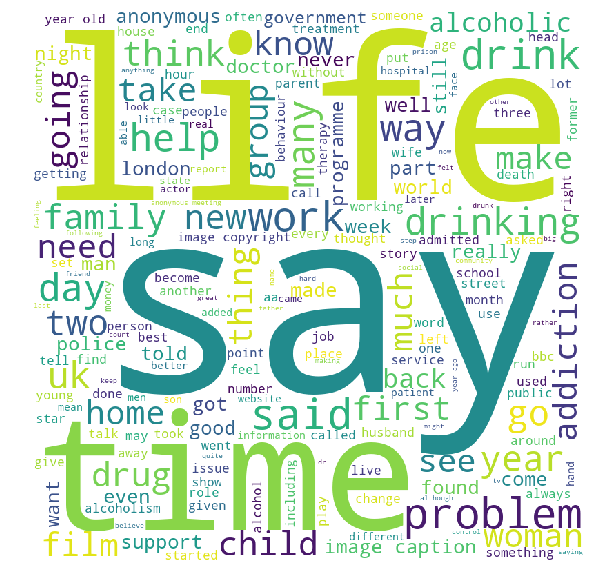

In [4]:
# Word Cloud
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df['News']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
